In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [21]:
X,Y = make_blobs(500,2,centers=4,cluster_std=1)

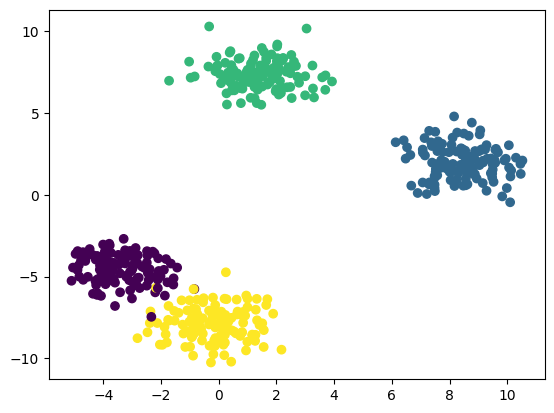

In [22]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [27]:
def initializeCluster(k,n_features=2):
    clusters = []
    for i in range(k):
        cluster = {}
        cluster['Center'] = 20*np.random.random((n_features,))-10
        cluster['Points']= []
        clusters.append(cluster)
    return clusters
def distance(v1,v2):
    return np.sqrt(np.sum((v2-v1)**2))

In [26]:
initializeCluster(4)

[{'Center': array([ 0.23840635, -0.50900775]), 'Points': []},
 {'Center': array([9.29125662, 9.48156451]), 'Points': []},
 {'Center': array([-3.76465227, -9.62782607]), 'Points': []},
 {'Center': array([ 6.86391841, -5.16228339]), 'Points': []}]

In [40]:
def arrangePoints(X,clusters):
    for i in range(X.shape[0]):
        curX = X[i]
        dist = []
        for nc in range(len(clusters)):
            dist.append(distance(curX,clusters[nc]['Center']))
        mc = np.argmin(dist)
        clusters[mc]['Points'].append(curX)

def updateClusters(clusters):
    for i in range(len(clusters)):
        if len(clusters[i]['Points']) > 0:
            clusters[i]['Center'] = np.mean(clusters[i]['Points'],axis=0)
            clusters[i]['Points'] = []

def plotClusters(clusters):
    for i in range(len(clusters)):
        pnts = np.array(clusters[i]['Points'])
        try:
            plt.scatter(pnts[:,0],pnts[:,1])
        except:
            pass
        cent = clusters[i]['Center']
        plt.scatter(cent[0],cent[1],c='black')
    plt.show()

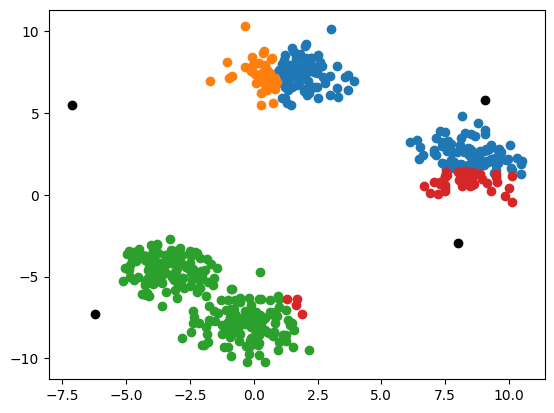

In [41]:
clusters = initializeCluster(4)
arrangePoints(X,clusters)
plotClusters(clusters)

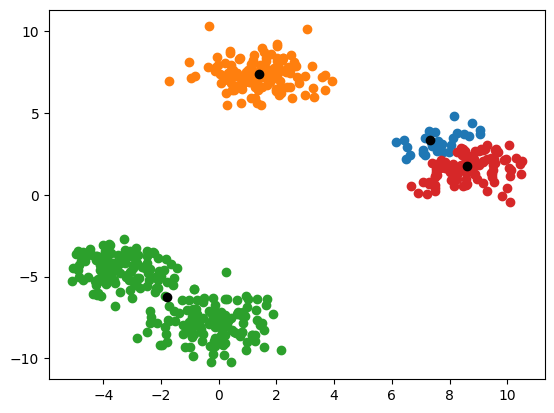

In [44]:
updateClusters(clusters)
arrangePoints(X,clusters)
plotClusters(clusters)

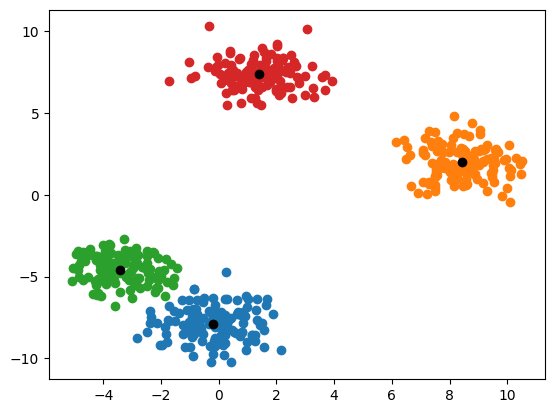

In [47]:
k = 4
clusters = initializeCluster(k)
for i in range(100):
    arrangePoints(X,clusters)
    updateClusters(clusters)
arrangePoints(X,clusters)
plotClusters(clusters)